In [11]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from tqdm import tqdm
from math import ceil
import matplotlib.pyplot as plt
from argparse import ArgumentParser
import random
from sklearn.manifold import TSNE

from t2_MLP import MLPTrainer

def set_seed(seed_value):
    random.seed(seed_value)
    np.random.seed(seed_value)
    torch.manual_seed(seed_value)
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed_value)
        torch.cuda.manual_seed_all(seed_value)
set_seed(42)
parser = ArgumentParser()
parser.add_argument("--device", type=str, default="cuda" if torch.cuda.is_available() else "cpu")
parser.add_argument("--epochs", type=int, default= 1e4)
parser.add_argument("--lr", type=float, default=5e-4)
# specific to MLP
parser.add_argument("--mlp_layers", type=int, default=4)
parser.add_argument("--mlp_embd_dim", type=int, default=128)
parser.add_argument("--mlp_hid_dim", type=int, default=128)
parser.add_argument("--MLP_optim", type=str, choices=["RMSprop", "AdamW", "Adam"], default="AdamW")
args, unknown = parser.parse_known_args()

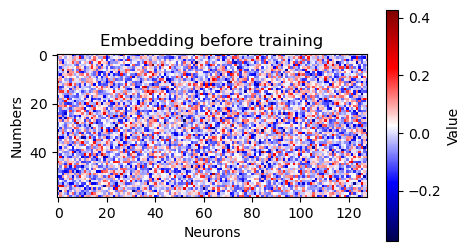

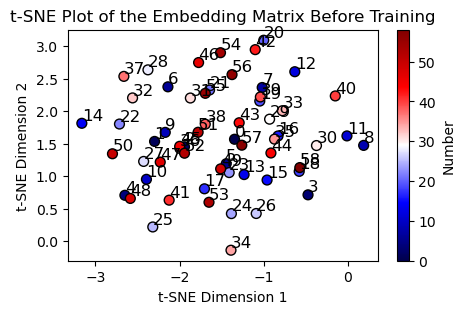

In [15]:
set_seed(42)
trainer = MLPTrainer(args)
trainer.generate_binary_dataset(59, 0.5)
embeddings = trainer.model.embedding(torch.tensor(np.arange(59), dtype=torch.long, device=args.device))
matrix = embeddings.detach().cpu().numpy()
plt.figure(figsize=(5, 3))
plt.imshow(matrix, cmap='seismic', interpolation='nearest')
plt.colorbar(label='Value')  # Add a color bar
plt.title('Embedding before training')
plt.xlabel('Neurons')
plt.ylabel('Numbers')
plt.show()
set_seed(42)
tsne = TSNE(n_components=2,random_state=42)
embedding_2d = tsne.fit_transform(matrix)
plt.figure(figsize=(5, 3))
plt.scatter(embedding_2d[:, 0], embedding_2d[:, 1], c=np.arange(len(matrix)), cmap='seismic', s=50, edgecolor='k')
plt.colorbar(label='Number')
for i, (x, y) in enumerate(embedding_2d):
    plt.text(x, y, str(i), fontsize=12, ha='left', va='bottom', color='black')
plt.title('t-SNE Plot of the Embedding Matrix Before Training')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

In [16]:
set_seed(42)
trainer.train_binary()

Epoch:   0%|                                                                         | 2/10000 [00:00<12:24, 13.43it/s]

Epoch 0 Train Loss: 0.0160 Train Acc: 0.0140
Epoch 0 Test Loss: 0.0160 Test Acc: 0.0195


Epoch:  20%|██████████████                                                        | 2005/10000 [01:09<05:40, 23.45it/s]

Epoch 2000 Train Loss: 0.0001 Train Acc: 0.9710
Epoch 2000 Test Loss: 0.0354 Test Acc: 0.0502


Epoch:  40%|████████████████████████████                                          | 4005/10000 [02:32<04:33, 21.95it/s]

Epoch 4000 Train Loss: 0.0000 Train Acc: 0.9710
Epoch 4000 Test Loss: 0.0447 Test Acc: 0.1434


Epoch:  60%|██████████████████████████████████████████                            | 6002/10000 [04:36<11:34,  5.76it/s]

Epoch 6000 Train Loss: 0.0000 Train Acc: 0.9710
Epoch 6000 Test Loss: 0.0054 Test Acc: 0.7132


Epoch:  80%|████████████████████████████████████████████████████████              | 8003/10000 [07:27<01:50, 18.07it/s]

Epoch 8000 Train Loss: 0.0000 Train Acc: 0.9710
Epoch 8000 Test Loss: 0.0000 Test Acc: 0.9715


Epoch: 100%|█████████████████████████████████████████████████████████████████████| 10000/10000 [10:24<00:00, 16.02it/s]

Training Finished


In [17]:
torch.save(trainer.model.state_dict(),"trained_model.pth")

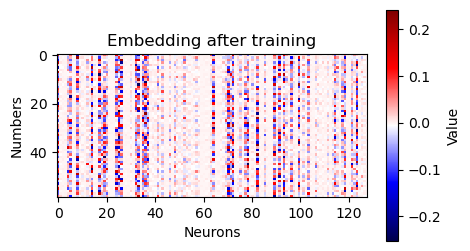

In [18]:
embeddings = trainer.model.embedding(torch.tensor(np.arange(59), dtype=torch.long, device=args.device))
matrix = embeddings.detach().cpu().numpy()
plt.figure(figsize=(5, 3))
plt.imshow(matrix, cmap='seismic', interpolation='nearest')
plt.colorbar(label='Value')  # Add a color bar
plt.title('Embedding after training')
plt.xlabel('Neurons')
plt.ylabel('Numbers')
plt.show()

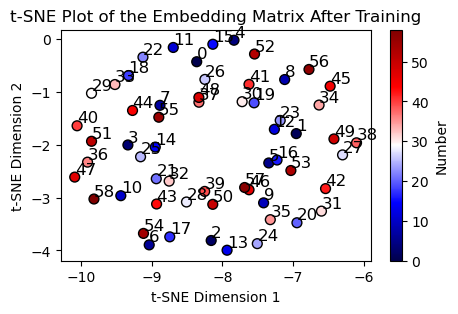

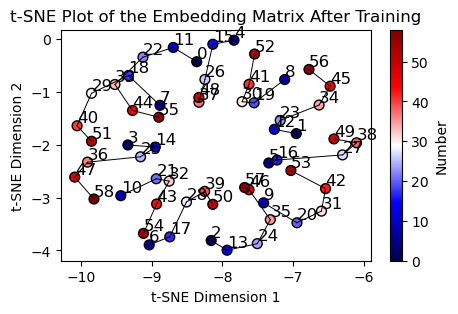

In [28]:
tsne = TSNE(n_components=2,random_state=42)
embedding_2d = tsne.fit_transform(matrix)
plt.figure(figsize=(5, 3))
plt.scatter(embedding_2d[:, 0], embedding_2d[:, 1], c=np.arange(len(matrix)), cmap='seismic', s=50, edgecolor='k')
plt.colorbar(label='Number')
for i, (x, y) in enumerate(embedding_2d):
    plt.text(x, y, str(i), fontsize=12, ha='left', va='bottom', color='black')
plt.title('t-SNE Plot of the Embedding Matrix After Training')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()
tsne = TSNE(n_components=2,random_state=42)
embedding_2d = tsne.fit_transform(matrix)
plt.figure(figsize=(5, 3))
plt.scatter(embedding_2d[:, 0], embedding_2d[:, 1], c=np.arange(len(matrix)), cmap='seismic', s=50, edgecolor='k')
plt.colorbar(label='Number')
for i, (x, y) in enumerate(embedding_2d):
    plt.text(x, y, str(i), fontsize=12, ha='left', va='bottom', color='black')
for i in range(len(embedding_2d)-11):
    if (i - (i - 11)) == 11:
        x1, y1 = embedding_2d[i]
        x2, y2 = embedding_2d[i + 11]
        plt.plot([x1, x2], [y1, y2], 'k-', lw=0.7)  # 'k-' is for black lines
plt.title('t-SNE Plot of the Embedding Matrix After Training')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

(59, 5)


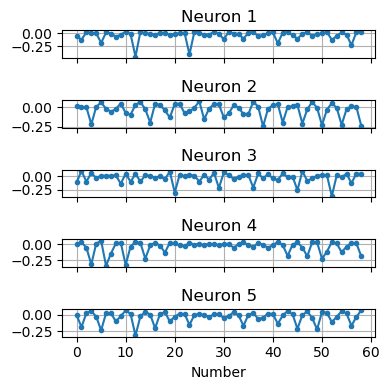

In [29]:
set_seed(42)
output_weights = trainer.model.output.weight.cpu().detach().numpy()
output_weights.shape
norms  = np.linalg.norm(output_weights, axis=0)
threshold = 0.7
mask = norms > threshold
selected_weights = output_weights[:, mask]
print(selected_weights.shape)
fig, ax = plt.subplots(nrows=selected_weights.shape[1], ncols=1, figsize=(4, 4), sharex=True)
for i in range(selected_weights.shape[1]):
    ax[i].plot(selected_weights[:, i], marker='.', linestyle='-')
    ax[i].set_title(f'Neuron {i+1}')
    ax[i].grid(True)
ax[-1].set_xlabel('Number')
plt.tight_layout()
plt.show()

In [31]:
for param in trainer.model.parameters():
    print(param.size())
model = trainer.model
loss_fn = torch.nn.CrossEntropyLoss()  
params = list(model.parameters())
weights_dict = {name: p.detach().cpu().numpy() for name, p in model.named_parameters() if len(p.shape) == 2}
print(weights_dict.keys())
inputs = trainer.generate_full_binary_data(59)
inputs = torch.tensor(inputs[:,:-1], dtype=torch.long, device=args.device)
model.eval()
model(inputs[:,0],inputs[:,1])
print(loss_fn(model(inputs[:,0],inputs[:,1]), inputs[:,-1]))

torch.Size([59, 128])
torch.Size([128, 256])
torch.Size([128])
torch.Size([128, 128])
torch.Size([128])
torch.Size([59, 128])
torch.Size([59])
dict_keys(['embedding.weight', 'linear1.weight', 'linear2.weight', 'output.weight'])
tensor(72.7462, device='cuda:0', grad_fn=<NllLossBackward0>)


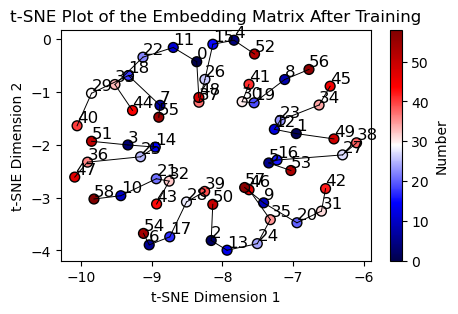

In [74]:
set_seed(42)
new_train = MLPTrainer(args)
new_train.generate_binary_dataset(59, 0.5)
new_train.model.load_state_dict(torch.load("trained_model.pth"))
embeddings = new_train.model.embedding(torch.tensor(np.arange(59), dtype=torch.long, device=args.device))
matrix = embeddings.detach().cpu().numpy()
tsne = TSNE(n_components=2,random_state=42)
embedding_2d = tsne.fit_transform(matrix)
plt.figure(figsize=(5, 3))
plt.scatter(embedding_2d[:, 0], embedding_2d[:, 1], c=np.arange(len(matrix)), cmap='seismic', s=50, edgecolor='k')
plt.colorbar(label='Number')
for i, (x, y) in enumerate(embedding_2d):
    plt.text(x, y, str(i), fontsize=12, ha='left', va='bottom', color='black')
for i in range(len(embedding_2d)-11):
    if (i -(i-11)) == 11:
        x1, y1 = embedding_2d[i]
        x2, y2 = embedding_2d[i-11]
        plt.plot([x1, x2], [y1, y2], 'k-',lw=0.7)  # 'k-' is for black lines
plt.title('t-SNE Plot of the Embedding Matrix After Training')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

In [90]:
new_train = MLPTrainer(args)
new_train.generate_binary_dataset(59, 0.5)
new_train.model.load_state_dict(torch.load("trained_model.pth"))
set_seed(42)
params = list(new_train.model.parameters())
weights_dict = {name: p.detach().cpu().numpy() for name, p in new_train.model.named_parameters() if len(p.shape) == 2}
print(weights_dict.keys())
inputs = new_train.generate_full_binary_data(59)
inputs = torch.tensor(inputs[:,:-1], dtype=torch.long, device=args.device)
loss_fn = nn.CrossEntropyLoss()
new_train.model.eval()
print(loss_fn(new_train.model(inputs[:,0],inputs[:,1]), inputs[:,-1]))
perturbed_weights = {name: w + np.random.randn(*w.shape) * perturbation_scale for name, w in weights_dict.items()}
new_train.model.linear1.weight.data = torch.tensor(perturbed_weights['linear1.weight'], dtype=torch.float32, device=args.device)
new_train.model.linear2.weight.data = torch.tensor(perturbed_weights['linear2.weight'], dtype=torch.float32, device=args.device)
print(loss_fn(new_train.model(inputs[:,0],inputs[:,1]), inputs[:,-1]))

dict_keys(['embedding.weight', 'linear1.weight', 'linear2.weight', 'output.weight'])
tensor(72.7462, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(73.0510, device='cuda:0', grad_fn=<NllLossBackward0>)


In [91]:
def largest_eigenvalue(weight_matrix):
    weight_tensor = torch.tensor(weight_matrix, dtype=torch.float32)
    _, s, _ = torch.svd(weight_tensor)
    return s[0].item()
print(largest_eigenvalue(perturbed_weights['linear1.weight']))
print(largest_eigenvalue(weights_dict))

1.8356090784072876
1.8339382410049438


In [121]:
num_pert = 2000
perturbation_scales = np.linspace(0,0.01,num_pert+1)
perturbed_weights_list = []
l1_list = np.zeros(num_pert+1)
l2_list = np.zeros(num_pert+1)
loss_list = np.zeros(num_pert+1)

for i in tqdm(range(num_pert)):
    new_train = MLPTrainer(args)
    new_train.generate_binary_dataset(59, 0.5)
    new_train.model.load_state_dict(torch.load("trained_model.pth"))
    params = list(new_train.model.parameters())
    weights_dict = {name: p.detach().cpu().numpy() for name, p in new_train.model.named_parameters() if len(p.shape) == 2}
    rng = np.random.default_rng(i)
    perturbed_weights = {name: w + rng.normal(*w.shape) *  perturbation_scales[i] for name, w in weights_dict.items()}
    perturbed_weights_list.append(perturbed_weights)   
    new_train.model.linear1.weight.data = torch.tensor(perturbed_weights['linear1.weight'], dtype=torch.float32, device=args.device)
    new_train.model.linear2.weight.data = torch.tensor(perturbed_weights['linear2.weight'], dtype=torch.float32, device=args.device)
    loss_list[i] = np.log10(loss_fn(new_train.model(inputs[:,0],inputs[:,1]), inputs[:,-1]).cpu().detach().numpy())
    l1_list[i] = largest_eigenvalue(perturbed_weights_list[i]['linear1.weight'])
    l2_list[i] = largest_eigenvalue(perturbed_weights_list[i]['linear2.weight'])
    

100%|██████████████████████████████████████████████████████████████████████████████| 2000/2000 [02:12<00:00, 15.04it/s]


<IPython.core.display.Javascript object>


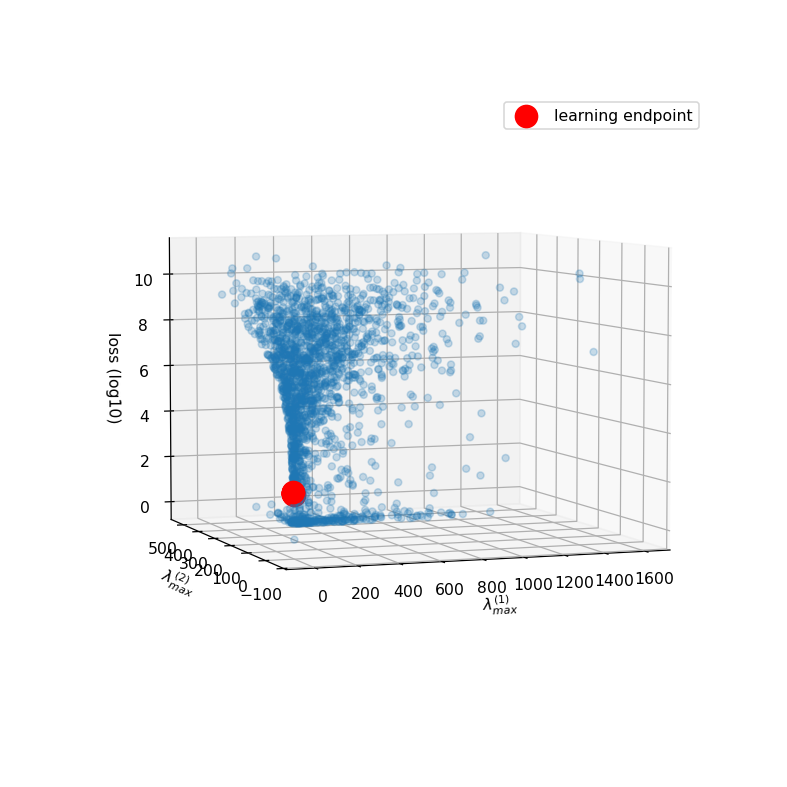

In [161]:
%matplotlib notebook
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim([-100,np.max(l1_list)])
ax.set_ylim([-100,np.max(l2_list)])
ax.set_xlabel(r"$\lambda_{max}^{(1)}$")
ax.set_ylabel(r"$\lambda_{max}^{(2)}$")
ax.set_zlabel("loss (log10)")
cmap = plt.get_cmap("Reds")
norm = plt.Normalize(vmin=0, vmax=9)
for i in range(10):
    if i ==0: 
        ax.scatter(l1_list[i],l2_list[i],loss_list[i],color = 'red', s = 200, alpha = 1, label ="learning endpoint")
    else:
        ax.scatter(l1_list[i],l2_list[i],loss_list[i],color = 'red', s = 200, alpha = 1)
        
ax.scatter(l1_list[10:],l2_list[10:],loss_list[10:], alpha = 0.233)
ax.view_init(elev=5, azim=250)
plt.legend()
plt.savefig("3d-eigensplot.png",dpi = 500)
plt.show()

<IPython.core.display.Javascript object>


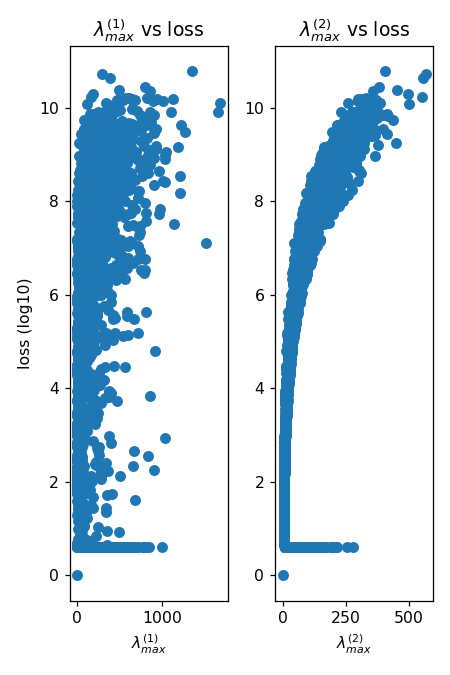

In [168]:
fig, ax = plt.subplots(1, 2, figsize=(4,6))
ax[0].scatter(l1_list, loss_list)
ax[0].set_xlabel(r"$\lambda_{max}^{(1)}$")
ax[0].set_ylabel("loss (log10)")
ax[0].set_title(r"$\lambda_{max}^{(1)}$ vs loss")
ax[1].scatter(l2_list, loss_list)
ax[1].set_xlabel(r"$\lambda_{max}^{(2)}$")
ax[1].set_title(r"$\lambda_{max}^{(2)}$ vs loss")
plt.tight_layout()
plt.savefig("2d-eigens.png", dpi = 600)
plt.show()